In [ ]:
# DATASET DOSYASINI GOOGLE DRİVE /tmp klasörüne unzip edilmesi
import shutil
from google.colab import drive

drive.mount("/content/gdrive")
# Change the code below if the path to the dataset is different for you.
shutil.unpack_archive("/content/gdrive/MyDrive/linearcsv.zip", "/tmp/")
shutil.unpack_archive("/content/gdrive/MyDrive/2016dolaralis.zip", "/tmp/")
shutil.unpack_archive("/content/gdrive/MyDrive/breast_cancer.zip", "/tmp/")
shutil.unpack_archive("/content/gdrive/MyDrive/tensors.zip", "/tmp/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Filepath kontrol edilmesi
import os

file_path = r"/tmp/linear.csv"
if os.path.exists(file_path):
    print("Dosya bulundu.")
else:
    print("Dosya bulunamadı.")

Dosya bulundu.


Eğim :  [[1.70655779]]
 Y eksenini kestiği yer :  [-0.0059023]


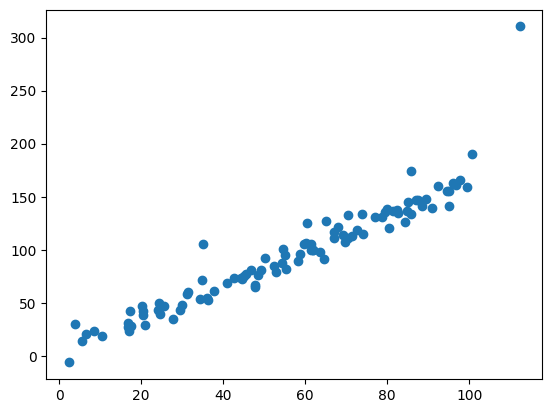

In [ ]:
# Daire Metrekare ve Fiyat Tahmini
# Lineer Regressyon örneği
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as lr
import matplotlib.pyplot as plt

data = pd.read_csv(file_path)

x= data ["metrekare"]
y = data ["fiyat"]

x = x.values.reshape(99,1)
y = y.values.reshape (99,1)

lineerregresyon = lr()

lineerregresyon.fit(x,y)

lineerregresyon.predict(x)

m = lineerregresyon.coef_
b= lineerregresyon.intercept_

print("Eğim : " , m )
print(" Y eksenini kestiği yer : " , b )

a = np.arange (150)

plt.scatter(x,y)
# plt.scatter(a, m*a +b)
plt.show()

In [ ]:
# Daire Metrekare ve Fiyat Tahmini
# İnput ile sorup ne kadar olduğu bulunur


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Veriyi okuma
data = pd.read_csv(file_path)

# Metrekare ve fiyat değerlerini alalım
X = data["metrekare"].values.reshape(-1, 1)  # X'i 2 boyutlu hale getiriyoruz
y = data["fiyat"].values

# Doğrusal regresyon modeli oluşturma
model = LinearRegression()
model.fit(X, y)

# Tahmin edilen fiyatlar
y_pred = model.predict(X)



# Yeni bir değer için tahmin
z = int(input("Kaç metrekare? "))
tahmin = model.predict([[z]])
print(f"Tahmini fiyat: {tahmin[0]}")

# Modelin parametreleri
print(f"y = {model.coef_[0]}x + {model.intercept_}")



# Veriyi görselleştirme
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Metrekare")
plt.ylabel("Fiyat")
plt.title("Metrekareye Göre Fiyat Tahmini")
plt.show()

Kaç metrekare? 10
Tahmini fiyat: 17.059675590467652
y = 1.70655778945782x + -0.005902304110549039


Dosya bulundu.
     Gun   Fiyat
0      1  2.9181
1      2  2.9422
2      3  2.9750
3      4  3.0040
4      5  3.0167
..   ...     ...
246  247  3.5077
247  248  3.5041
248  249  3.5135
249  250  3.5329
250  251  3.5318

[251 rows x 2 columns]


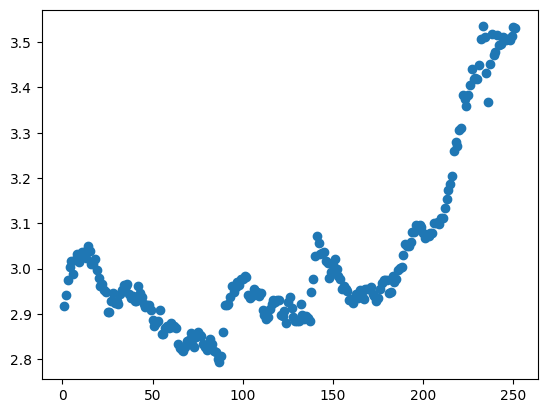

In [ ]:
# Dolar Tahmin Lineer Regressyon

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import os



file_path = r"/tmp/2016dolaralis.csv"
if os.path.exists(file_path):
    print("Dosya bulundu.")
else:
    print("Dosya bulunamadı.")

veri = pd.read_csv(file_path)

print(veri)

x = veri ["Gun"]
y = veri ["Fiyat"]

#x = x.values.reshape(251,1)
#y = y.values.reshape ( 251,1)

# Veriyi şekillendir
x = x.values.reshape(-1, 1)  # Otomatik boyutlandırma
y = y.values.reshape(-1, 1)


# tüm noktaların gösterimi
plt.scatter(x,y)


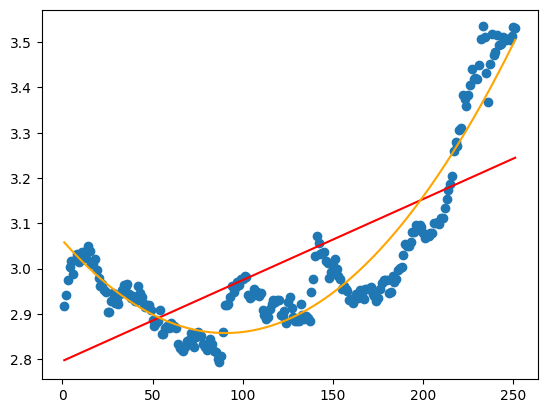

In [ ]:
#Lineer Regressyon ve Polinom Regressyon

# tüm noktaların gösterimi
plt.scatter(x,y)


#Lineer Regressyon
tahminLineer = LinearRegression()
tahminLineer.fit(x,y)
tahminLineer.predict(x)

plt.plot(x, tahminLineer.predict(x) , c="red")


# polinom Regressyon
tahminpolinom = PolynomialFeatures(degree=2)
Xyeni = tahminpolinom.fit_transform(x)

polinommodel = LinearRegression()
polinommodel.fit(Xyeni, y)
polinommodel.predict(Xyeni)
plt.plot (x ,   polinommodel.predict(Xyeni) , c="orange")

plt.show()

In [ ]:
# Kareler farkı yöntemini kullanarak hata fonksiyonlarını bulma

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# x ve y burada tanımlanmış olmalı, örneğin:
# x = np.array([...])
# y = np.array([...])

hatakaresipolinom = 0

for a in range(150):
    tahminpolinom = PolynomialFeatures(degree=a + 1)
    Xyeni = tahminpolinom.fit_transform(x)

    polinommodel = LinearRegression()
    polinommodel.fit(Xyeni, y)
    y_pred = polinommodel.predict(Xyeni)  # Tahminleri bir değişkene alıyoruz

    for i in range(len(Xyeni)):
        hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`

    print(f"{a + 1} inci dereceden fonksiyonda hata: {hatakaresipolinom:.3f}")

    hatakaresipolinom = 0


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

1 inci dereceden fonksiyonda hata: 4.481
2 inci dereceden fonksiyonda hata: 1.002
3 inci dereceden fonksiyonda hata: 0.799
4 inci dereceden fonksiyonda hata: 0.671
5 inci dereceden fonksiyonda hata: 0.667
6 inci dereceden fonksiyonda hata: 0.454
7 inci dereceden fonksiyonda hata: 0.388
8 inci dereceden fonksiyonda hata: 0.500
9 inci dereceden fonksiyonda hata: 0.621
10 inci dereceden fonksiyonda hata: 0.683
11 inci dereceden fonksiyonda hata: 0.698
12 inci dereceden fonksiyonda hata: 0.705
13 inci dereceden fonksiyonda hata: 0.713
14 inci dereceden fonksiyonda hata: 0.718
15 inci dereceden fonksiyonda hata: 0.720
16 inci dereceden fonksiyonda hata: 0.720
17 inci dereceden fonksiyonda hata: 0.719
18 inci dereceden fonksiyonda hata: 0.718
19 inci dereceden fonksiyonda hata: 0.717
20 inci dereceden fonksiyonda hata: 0.716
21 inci dereceden fonksiyonda hata: 0.716
22 inci dereceden fonksiyonda hata: 0.717
23 inci dereceden fonksiyonda hata: 0.718
24 inci dereceden fonksiyonda hata: 0.721
2

<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

36 inci dereceden fonksiyonda hata: 0.809
37 inci dereceden fonksiyonda hata: 0.825
38 inci dereceden fonksiyonda hata: 0.844
39 inci dereceden fonksiyonda hata: 0.865
40 inci dereceden fonksiyonda hata: 0.888
41 inci dereceden fonksiyonda hata: 0.914


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

42 inci dereceden fonksiyonda hata: 0.942
43 inci dereceden fonksiyonda hata: 0.973
44 inci dereceden fonksiyonda hata: 1.006
45 inci dereceden fonksiyonda hata: 1.042


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`


46 inci dereceden fonksiyonda hata: 1.081
47 inci dereceden fonksiyonda hata: 1.122


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

48 inci dereceden fonksiyonda hata: 1.165
49 inci dereceden fonksiyonda hata: 1.210
50 inci dereceden fonksiyonda hata: 1.257
51 inci dereceden fonksiyonda hata: 1.307
52 inci dereceden fonksiyonda hata: 1.358
53 inci dereceden fonksiyonda hata: 1.411
54 inci dereceden fonksiyonda hata: 1.465
55 inci dereceden fonksiyonda hata: 1.520
56 inci dereceden fonksiyonda hata: 1.577
57 inci dereceden fonksiyonda hata: 1.635


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

58 inci dereceden fonksiyonda hata: 1.694
59 inci dereceden fonksiyonda hata: 1.754
60 inci dereceden fonksiyonda hata: 1.814
61 inci dereceden fonksiyonda hata: 1.874
62 inci dereceden fonksiyonda hata: 1.935
63 inci dereceden fonksiyonda hata: 1.997

<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo


64 inci dereceden fonksiyonda hata: 2.058
65 inci dereceden fonksiyonda hata: 2.120
66 inci dereceden fonksiyonda hata: 2.181
67 inci dereceden fonksiyonda hata: 2.243
68 inci dereceden fonksiyonda hata: 2.304
69 inci dereceden fonksiyonda hata: 2.365


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

70 inci dereceden fonksiyonda hata: 2.425
71 inci dereceden fonksiyonda hata: 2.485
72 inci dereceden fonksiyonda hata: 2.545
73 inci dereceden fonksiyonda hata: 2.604
74 inci dereceden fonksiyonda hata: 2.663
75 inci dereceden fonksiyonda hata: 2.721


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

76 inci dereceden fonksiyonda hata: 2.778
77 inci dereceden fonksiyonda hata: 2.835
78 inci dereceden fonksiyonda hata: 2.891
79 inci dereceden fonksiyonda hata: 2.946
80 inci dereceden fonksiyonda hata: 3.001
81 inci dereceden fonksiyonda hata: 3.055
82 inci dereceden fonksiyonda hata: 3.108
83 inci dereceden fonksiyonda hata: 3.161
84 inci dereceden fonksiyonda hata: 3.212
85 inci dereceden fonksiyonda hata: 3.263
86 inci dereceden fonksiyonda hata: 3.313
87 inci dereceden fonksiyonda hata: 3.363


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

88 inci dereceden fonksiyonda hata: 3.412
89 inci dereceden fonksiyonda hata: 3.460
90 inci dereceden fonksiyonda hata: 3.507
91 inci dereceden fonksiyonda hata: 3.553
92 inci dereceden fonksiyonda hata: 3.599
93 inci dereceden fonksiyonda hata: 3.644
94 inci dereceden fonksiyonda hata: 3.688
95 inci dereceden fonksiyonda hata: 4.861
96 inci dereceden fonksiyonda hata: 4.896


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

97 inci dereceden fonksiyonda hata: 4.931
98 inci dereceden fonksiyonda hata: 4.966
99 inci dereceden fonksiyonda hata: 5.000
100 inci dereceden fonksiyonda hata: 5.033
101 inci dereceden fonksiyonda hata: 5.065
102 inci dereceden fonksiyonda hata: 5.097
103 inci dereceden fonksiyonda hata: 5.129


<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

104 inci dereceden fonksiyonda hata: 5.160
105 inci dereceden fonksiyonda hata: 5.190
106 inci dereceden fonksiyonda hata: 5.220
107 inci dereceden fonksiyonda hata: 5.249
108 inci dereceden fonksiyonda hata: 5.278
109 inci dereceden fonksiyonda hata: 5.306
110 inci dereceden fonksiyonda hata: 5.334
111 inci dereceden fonksiyonda hata: 5.362
112 inci dereceden fonksiyonda hata: 5.388
113 inci dereceden fonksiyonda hata: 5.415
114 inci dereceden fonksiyonda hata: 5.441
115 inci dereceden fonksiyonda hata: 5.467
116 inci dereceden fonksiyonda hata: 5.492
117 inci dereceden fonksiyonda hata: 5.517
118 inci dereceden fonksiyonda hata: 5.541
119 inci dereceden fonksiyonda hata: 5.566
120 inci dereceden fonksiyonda hata: 5.589
121 inci dereceden fonksiyonda hata: 5.613
122 inci dereceden fonksiyonda hata: 5.636
123 inci dereceden fonksiyonda hata: 5.658
124 inci dereceden fonksiyonda hata: 5.681
125 inci dereceden fonksiyonda hata: 5.703
126 inci dereceden fonksiyonda hata: 5.724
127 inci de

<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - float(y_pred[i])) ** 2  # Skalar değer için `y_pred[i]`
<ipython-input-16-dfdb8720a8db>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom += (float(y[i]) - flo

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
import os

file_path2 = r"/tmp/breast-cancer-wisconsin.data"
if os.path.exists(file_path2):
    print("Dosya bulundu.")
else:
    print("Dosya bulunamadı.")

Dosya bulundu.


In [ ]:
#  k-nearest neighbors (KNN) algorithm kullanarak kanser datasetinden hasta ve sağlıklı insanları predict etme
# 2 -> sağlıklı, 4-> kanserli

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd



# Veriyi yükle
veri = pd.read_csv(file_path2)

# '?' karakterlerini -99999 ile değiştir
veri.replace('?', -99999, inplace=True)

# 'id' sütununu düşür
veri.drop(['id'], axis=1, inplace=True)

# Hedef ve özellikleri ayır
y = veri['benormal']
x = veri.drop(['benormal'], axis=1)

# Eksik değerleri doldurmak için SimpleImputer kullan
imp = SimpleImputer(missing_values=-99999, strategy="mean")
x = imp.fit_transform(x)

# K-Nearest Neighbors modelini oluştur ve eğit
tahmin = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean')
tahmin.fit(x, y)

# Eğitim verisi üzerindeki tahminler ve doğruluk
ytahmin = tahmin.predict(x)
basari = accuracy_score(y, ytahmin)

print("Yüzde", basari * 100, " oranında başarı sağlandı.")

# Yeni bir örnek üzerinde tahmin yap
# Not: Burada girdi olarak verilen liste, modelin beklediği özellik sayısına uymalıdır.
try:
    print(tahmin.predict([[1, 2, 2, 2, 3, 2, 1, 2, 3]]))
except ValueError as e:
    print("Hata:", e)



# Farklı k-komşuluk değerleri seçildiğinde başarı oranının hesaplanması
for z in range(25):
    z = 2*z+1
    print("En yakın",z,"komşu kullandığımızda tutarlılık oranımız")
    tahmin = KNeighborsClassifier(n_neighbors=z , weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean')
    tahmin.fit(x,y)
    ytahmin = tahmin.predict(x)

    basari = accuracy_score(y, ytahmin, normalize=True, sample_weight=None)
    print(basari)


Yüzde 98.14020028612303  oranında başarı sağlandı.
[2]
En yakın 1 komşu kullandığımızda tutarlılık oranımız
1.0
En yakın 3 komşu kullandığımızda tutarlılık oranımız
0.9814020028612304
En yakın 5 komşu kullandığımızda tutarlılık oranımız
0.9742489270386266
En yakın 7 komşu kullandığımızda tutarlılık oranımız
0.977110157367668
En yakın 9 komşu kullandığımızda tutarlılık oranımız
0.9742489270386266
En yakın 11 komşu kullandığımızda tutarlılık oranımız
0.9728183118741058
En yakın 13 komşu kullandığımızda tutarlılık oranımız
0.9685264663805436
En yakın 15 komşu kullandığımızda tutarlılık oranımız
0.9685264663805436
En yakın 17 komşu kullandığımızda tutarlılık oranımız
0.9685264663805436
En yakın 19 komşu kullandığımızda tutarlılık oranımız
0.9685264663805436
En yakın 21 komşu kullandığımızda tutarlılık oranımız
0.9685264663805436
En yakın 23 komşu kullandığımızda tutarlılık oranımız
0.9656652360515021
En yakın 25 komşu kullandığımızda tutarlılık oranımız
0.9685264663805436
En yakın 27 komşu

In [ ]:
# K-fold cross validation yöntemi kullanarak kanser tespitinin yapılması
# test ve train olarak 2 sınıfa ayrılıyor öncelikle

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



imp= SimpleImputer(missing_values=-99999, strategy="mean")

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
x= imp.fit_transform(x)

scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

"""for z in range(25):
    z = 2*z+1
    print("En yakın",z,"komşu kullandığımızda tutarlılık oranımız")
    tahmin = KNeighborsClassifier(n_neighbors=z, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)
    tahmin.fit(x,y)
    ytahmin = tahmin.predict(x)

    basari = accuracy_score(y, ytahmin, normalize=True, sample_weight=None)
    print(basari)"""

tahmin= KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)
tahmin.fit(X_train , y_train)
ytahmin=tahmin.predict(x)
basari= tahmin.score(X_test, y_test)
print("Yüzde",basari*100," oranında:" )
a= np.array([1,2,2,2,3,2,1,2,3]).reshape(1,-1)
print(tahmin.predict(a))


Yüzde 95.0  oranında:
[4]


In [ ]:
# Makine Öğrenmesi 20 - Decision Tree Coding

from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import sklearn

iris = datasets.load_iris()

model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

# Tek bir örnek için tahmin yap
sample = [6.7, 3.3, 5.7, 2.5]
prediction = model.predict([sample])  # Listeyi iki boyutlu hale getir
print("Tahmin edilen sınıf:", prediction)
print("Tahmin edilen sınıf ismi :", iris.target_names [prediction] )

# print(iris.target_names)

Tahmin edilen sınıf: [2]
Tahmin edilen sınıf ismi : ['virginica']
['setosa' 'versicolor' 'virginica']


In [ ]:
# ders 21 . yapay sinir ağlarını öğrenelim
# sadece bir nörona sahip bir sinir ağı oluşturma
import numpy
from numpy import exp, array, random,dot,mean,abs

girdi = array  ( [ [0,0,1] , [1,1,1] ,  [1,0,1]  ])

gerceksonuc = array  ( [ [0,1,1] ]).T

agirlik = array ( [ [1.0, 1.0, 1.0] ] ).T

for tekrar in range(100) :
  hucredegeri = dot (girdi , agirlik)
  #print(hucredegeri)

  tahmin = 1/ (1 + exp (-hucredegeri) )
  #print(tahmin)

  agirlik =  agirlik + dot (girdi.T, ( ( gerceksonuc -tahmin)* tahmin *(1-tahmin) )   )

 # print ( str (numpy.mean (numpy.abs(gerceksonuc - tahmin ))))


  # Tahmin yaptırma

print( 1 / (1 + exp (- (dot (array( [1,0,0]), agirlik )))) )

[0.97718978]


In [ ]:
# Filepath kontrol edilmesi
import os

file_path5 = r"/tmp/dad.png"
if os.path.exists(file_path5):
    print("Dosya bulundu.")
else:
    print("Dosya bulunamadı.")

Dosya bulundu.


In [ ]:
# Tensorflow uygulaması
# El yazısı rakamı tanıma



from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import scipy.ndimage
import tensorflow as tf
import numpy as np

x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))

b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

cizim = np.vectorize(lambda x: 255 - x)(np.ndarray.flatten(scipy.ndimage.imread(file_path5, flatten=True)))

sonuc = sess.run(tf.argmax(y, 1), feed_dict={x: [cizim]})

print(sonuc)

In [ ]:
# Tensorflow 1- Keras Ve Mnist ile kavramları öğrenme, El yazısı Tanıma

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# MNIST veri setini yükleme
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Veriyi normalize etme ve yeniden şekillendirme
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Etiketleri one-hot encoding ile dönüştürme
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


print(type(X_train), X_train.dtype)  # np.ndarray ve float32 olmalı
print(type(y_train), y_train.dtype)  # np.ndarray ve float32 veya int32 olmalı

<class 'numpy.ndarray'> float32
<class 'numpy.ndarray'> float64


In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
print(tf.__version__)

2.18.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# MNIST veri setini yükleme
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Veriyi normalize etme ve yeniden şekillendirme
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Etiketleri one-hot encoding ile dönüştürme
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model oluşturma
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Modeli test etme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Modeli kaydetme (isteğe bağlı)
model.save("mnist_digit_recognition_model.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8976 - loss: 0.3233 - val_accuracy: 0.9838 - val_loss: 0.0541
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9857 - loss: 0.0458 - val_accuracy: 0.9873 - val_loss: 0.0428
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9903 - loss: 0.0296 - val_accuracy: 0.9885 - val_loss: 0.0376
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9938 - loss: 0.0199 - val_accuracy: 0.9912 - val_loss: 0.0340
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9930 - val_loss: 0.0310
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0323


Test Accuracy: 0.9921


In [ ]:
import shutil
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os

file_path = r"/content/gdrive/MyDrive/dad.png"
if os.path.exists(file_path):
    print("Dosya bulundu.")
else:
    print("Dosya bulunamadı.")

Dosya bulundu.


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Eğitilmiş modeli yükleme
model = tf.keras.models.load_model("mnist_digit_recognition_model.h5")

# Tahmin için bir görüntüyü işleme
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Görüntüyü gri tonlamaya çevir
    img = img.resize((28, 28))  # MNIST boyutuna yeniden boyutlandır
    img_array = np.array(img)  # Görüntüyü NumPy dizisine çevir
    img_array = 255 - img_array  # Siyah beyazı tersine çevir (el yazısı MNIST ile uyumlu)
    img_array = img_array / 255.0  # Normalize et
    img_array = img_array.reshape(1, 28, 28, 1)  # Modelin giriş boyutuna göre yeniden şekillendir
    return img_array

# Görüntüyü tahmin etme
image_path = file_path
processed_image = preprocess_image(image_path)
prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)  # En yüksek olasılık değerine sahip sınıfı al

# Sonucu yazdırma
print(f"Tahmin edilen rakam: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
Tahmin edilen rakam: 6
